In [1]:
import glob
import os
from matplotlib import pyplot as plt
import pandas as pd
import pyedflib as plib


## Get info from Reports.csv

In [15]:
d_sex = {0:"Hombre",
         1 : "Mujer"}

In [2]:
file_path = "data\Reports.csv"

In [3]:
df_reports_raw = pd.read_csv(file_path, delimiter=',', header=0)    
df_reports_raw

,Subject ID,Case ID,Filename,Text of Report
0,10,10_Morning,subject010_Morning.edf,I umm I was with my parents and we're having a...
1,10,10_NREM,subject010_NREM.edf,Ummm... trying to put um everything together [...
2,10,10_REM,subject010_REM.edf,Yes I'm ummm... I'm in an argument with a...wi...
3,10,10_SO1,subject010_SO1.edf,What? I don't have a dream. What was your ques...
4,10,10_SO10,subject010_SO10.edf,Uhuh. Umm let's see.. Running around…(silence).
...,...,...,...,...
303,535,535_SO5,subject535_SO5.edf,So my friend came over my house today and she ...
304,535,535_SO6,subject535_SO6.edf,Umm so there is this recipe about making guaca...
305,535,535_SO7,subject535_SO7.edf,"Wheatgrass shots, I don't know if you know wha..."
306,535,535_SO8,subject535_SO8.edf,"My friend and his mom, umm trying to think, I ..."


## Get info from Records.csv

In [13]:
file_path = "Records.csv"

In [16]:
df_raw = pd.read_csv(file_path, delimiter=',', header=0)    
df_raw['Subject sex'] = df_raw['Subject sex'].map(lambda x: d_sex[x])
df_raw

,Filename,Case ID,Subject ID,Experience,Treatment group,Duration,EEG sample rate,Number of EEG channels,Last sleep stage,Has EOG,Has EMG,Has ECG,Proportion artifacts,Time of awakening,Subject age,Subject sex,Subject healthy,Has more data,Remarks
0,subject010_Morning.edf,10_Morning,10,2,NaN,73,400,58,5,1,1,0,NaN,7:17:27 AM,23,Hombre,1,1,NaN
1,subject010_NREM.edf,10_NREM,10,2,NaN,73,400,58,2,1,1,0,NaN,2:07:02 AM,23,Hombre,1,1,NaN
2,subject010_REM.edf,10_REM,10,2,NaN,73,400,58,5,1,1,0,NaN,3:50:48 AM,23,Hombre,1,1,NaN
3,subject010_SO1.edf,10_SO1,10,0,NaN,73,400,58,1,1,1,0,NaN,12:16:08 AM,23,Hombre,1,1,NaN
4,subject010_SO10.edf,10_SO10,10,2,NaN,73,400,58,2,1,1,0,NaN,12:54:12 AM,23,Hombre,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,subject535_SO5.edf,535_SO5,535,2,NaN,73,400,58,0,1,1,0,NaN,12:34:25 AM,21,Mujer,1,1,NaN
304,subject535_SO6.edf,535_SO6,535,2,NaN,73,400,58,1,1,1,0,NaN,12:39:22 AM,21,Mujer,1,1,NaN
305,subject535_SO7.edf,535_SO7,535,2,NaN,73,400,58,1,1,1,0,NaN,12:43:30 AM,21,Mujer,1,1,NaN
306,subject535_SO8.edf,535_SO8,535,2,NaN,73,400,58,1,1,1,0,NaN,12:45:20 AM,21,Mujer,1,1,NaN


In [35]:
df_raw['Subject age'].unique()

array([23, 18, 19, 20, 21, 22], dtype=int64)

In [6]:
pattern = 'data\\PSG\\*.edf'

# Use glob.glob to find all files matching the pattern
file_paths = glob.glob(pattern)
file_paths

['data\\PSG\\subject010_Morning.edf',
 'data\\PSG\\subject010_NREM.edf',
 'data\\PSG\\subject010_REM.edf',
 'data\\PSG\\subject010_SO1.edf',
 'data\\PSG\\subject010_SO10.edf',
 'data\\PSG\\subject010_SO2.edf',
 'data\\PSG\\subject010_SO3.edf',
 'data\\PSG\\subject010_SO4.edf',
 'data\\PSG\\subject010_SO5.edf',
 'data\\PSG\\subject010_SO6.edf',
 'data\\PSG\\subject010_SO7.edf',
 'data\\PSG\\subject010_SO8.edf',
 'data\\PSG\\subject010_SO9.edf',
 'data\\PSG\\subject026_Morning.edf',
 'data\\PSG\\subject026_NREM.edf',
 'data\\PSG\\subject026_REM.edf',
 'data\\PSG\\subject026_SO1.edf',
 'data\\PSG\\subject026_SO10.edf',
 'data\\PSG\\subject026_SO2.edf',
 'data\\PSG\\subject026_SO3.edf',
 'data\\PSG\\subject026_SO4.edf',
 'data\\PSG\\subject026_SO5.edf',
 'data\\PSG\\subject026_SO6.edf',
 'data\\PSG\\subject026_SO7.edf',
 'data\\PSG\\subject026_SO8.edf',
 'data\\PSG\\subject026_SO9.edf',
 'data\\PSG\\subject030_Morning.edf',
 'data\\PSG\\subject030_NREM.edf',
 'data\\PSG\\subject030_REM.edf

In [7]:
signals_psg, signals_headers_psg, header_psg = plib.highlevel.read_edf(edf_file=file_paths[1])


In [10]:
file_paths[1]

'data\\PSG\\subject010_NREM.edf'

In [9]:
header_psg

{'technician': '',
 'recording_additional': '',
 'patientname': '10 NREM',
 'patient_additional': '',
 'patientcode': '10',
 'equipment': '',
 'admincode': '',
 'sex': 'Male',
 'startdate': datetime.datetime(2015, 6, 1, 2, 15, 43),
 'birthdate': '',
 'gender': 'Male',
 'annotations': []}

In [30]:
df_raw

,Filename,Case ID,Subject ID,Experience,Treatment group,Duration,EEG sample rate,Number of EEG channels,Last sleep stage,Has EOG,Has EMG,Has ECG,Proportion artifacts,Time of awakening,Subject age,Subject sex,Subject healthy,Has more data,Remarks,age_group
0,subject010_Morning.edf,10_Morning,10,2,NaN,73,400,58,5,1,1,0,NaN,7:17:27 AM,23,Hombre,1,1,NaN,NaN
1,subject010_NREM.edf,10_NREM,10,2,NaN,73,400,58,2,1,1,0,NaN,2:07:02 AM,23,Hombre,1,1,NaN,NaN
2,subject010_REM.edf,10_REM,10,2,NaN,73,400,58,5,1,1,0,NaN,3:50:48 AM,23,Hombre,1,1,NaN,NaN
3,subject010_SO1.edf,10_SO1,10,0,NaN,73,400,58,1,1,1,0,NaN,12:16:08 AM,23,Hombre,1,1,NaN,NaN
4,subject010_SO10.edf,10_SO10,10,2,NaN,73,400,58,2,1,1,0,NaN,12:54:12 AM,23,Hombre,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,subject535_SO5.edf,535_SO5,535,2,NaN,73,400,58,0,1,1,0,NaN,12:34:25 AM,21,Mujer,1,1,NaN,"[21.0, 22.0)"
304,subject535_SO6.edf,535_SO6,535,2,NaN,73,400,58,1,1,1,0,NaN,12:39:22 AM,21,Mujer,1,1,NaN,"[21.0, 22.0)"
305,subject535_SO7.edf,535_SO7,535,2,NaN,73,400,58,1,1,1,0,NaN,12:43:30 AM,21,Mujer,1,1,NaN,"[21.0, 22.0)"
306,subject535_SO8.edf,535_SO8,535,2,NaN,73,400,58,1,1,1,0,NaN,12:45:20 AM,21,Mujer,1,1,NaN,"[21.0, 22.0)"


In [37]:
df_raw['Subject age'].min()

18

In [43]:
df_raw['age_group'].unique()

[(22.0, 23.0], (17.999, 19.0], (19.0, 20.0], (20.0, 21.0], (21.0, 22.0]]
Categories (5, interval[float64, right]): [(17.999, 19.0] < (19.0, 20.0] < (20.0, 21.0] < (21.0, 22.0] < (22.0, 23.0]]

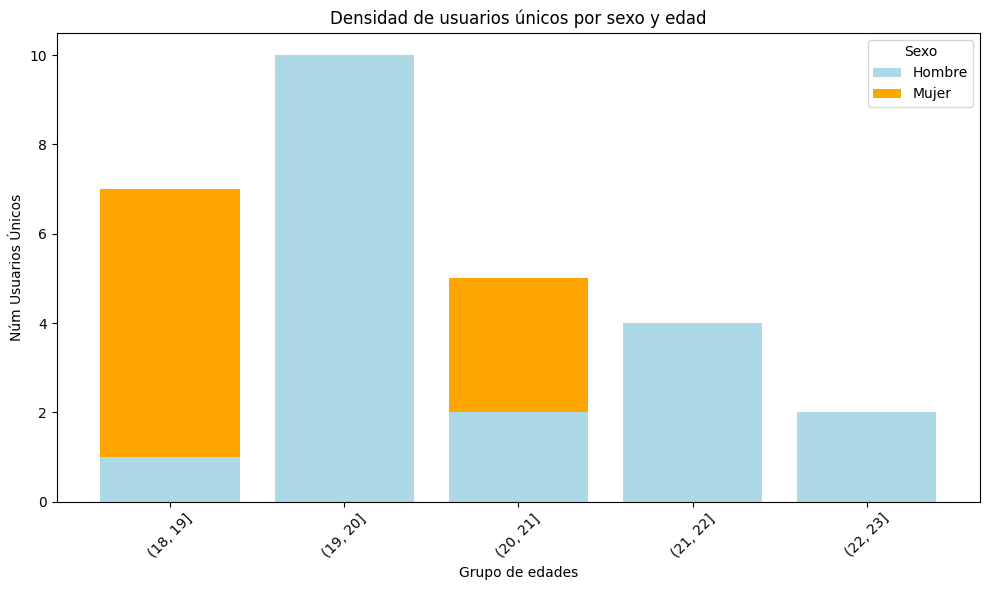

In [45]:
# Assuming 'df_raw' is your DataFrame

# Step 1: Bin ages (adjust bins according to your data's age distribution)
age_bins = range(df_raw['Subject age'].min(), df_raw['Subject age'].max() + 1, 1)  # Adjust the bin size as needed
df_raw['age_group'] = pd.cut(df_raw['Subject age'], bins=age_bins, right=True, include_lowest=True)

# Step 2: Count unique user_ids within each (age group, sex) combination
grouped = df_raw.groupby(['age_group', 'Subject sex'])['Subject ID'].nunique().unstack(fill_value=0)

colors = ['orange' if sex == 'Mujer' else 'lightblue' for sex in grouped.columns]

# Step 3: Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)
plt.title('Densidad de usuarios únicos por sexo y edad')
plt.xlabel('Grupo de edades')
plt.ylabel('Núm Usuarios Únicos')
plt.xticks(rotation=45, ticks=[4, 0, 1, 2, 3], labels=["(22, 23]", "(18, 19]", "(19, 20]", "(20, 21]", "(21, 22]"])
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [ ]:
for file_path in file_paths[:]:
    signals_stage = []

    # Construct the full paths to the .edf files
    # psg_file_path = os.path.join(folder_path, psg_file)
    # hypnogram_file_path = os.path.join(folder_path, hypnogram_file)
    
    # Load the PSG and Hypnogram files
    signals_psg, signals_headers_psg, header_psg = plib.highlevel.read_edf(edf_file=psg_file_path)
    _, _, header_hypnogram = plib.highlevel.read_edf(edf_file=hypnogram_file_path)

    user_id = psg_file[3:5]
    user_night = psg_file[5]
    sex = header_hypnogram['sex'] if 'sex' in header_hypnogram else 'Unknown'
    patient_age = header_hypnogram['patientname'].split(' ')[-1].strip('yr') if 'patientname' in header_hypnogram else 'Unknown'

    for annotation in header_hypnogram['annotations'][:-1]:
        # Extract the start index, number of signals, and label from the annotation
        start_index = int(annotation[0])
        num_signals = int(annotation[1])
        label = annotation[2][-1]
        
        # Extract the PSG signals corresponding to the current sleep stage
        for i in range(start_index, (start_index + num_signals) -1 ):
            sensor_1 = np.mean(signals_psg[0][(i * 100) : (i * 100) + 100])
            sensor_2 = np.mean(signals_psg[1][(i * 100) : (i * 100) + 100])
            sensor_3 = np.mean(signals_psg[2][(i * 100) : (i * 100) + 100])
            sensor_4 = signals_psg[3][i]
            sensor_5 = signals_psg[4][i]
            sensor_6 = signals_psg[5][i]
            sensor_7 = signals_psg[6][i]
            
            signals_stage.append({
                'sensor_1': sensor_1,
                'sensor_2': sensor_2,
                'sensor_3': sensor_3,
                'sensor_4': sensor_4,
                'sensor_5': sensor_5,
                'sensor_6': sensor_6,
                'sensor_7': sensor_7,
                'label': label,
                'user_id': user_id,
                'user_night': user_night,
                'sex': sex,
                'patient_age': patient_age,
            })

    data = pd.DataFrame(signals_stage)

    # Save the DataFrame to a CSV file
    data.to_csv(f'sleep-cassette-csv/{user_id}-SC-EEG.csv', sep=';', index=False)